<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB10.%20Chest%20Xray%20Classification%20Using%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest XRay Classification Using YOLOv8



## 1. Introduction



### The Importance of Radiological Images in Medicine

Medical imaging is a critical component of modern healthcare, providing invaluable insights that aid in diagnosis, treatment planning, and disease monitoring. Among various types of medical images, radiological images play a pivotal role. This document explores the significance of radiological images compared to other medical images and delves into the impact of machine learning in their analysis and diagnostic support.

#### Types of Medical Imaging

Medical imaging encompasses a variety of techniques, each with its unique applications and strengths. Key types include:

1. **Radiography (X-rays)**: Uses X-rays to view the internal str#ucture of the body, particularly useful for examining bones and detecting fractures.
2. **Computed Tomography (CT)**: Combines X-ray images taken from different angles to create cross-sectional images, offering detailed views of bones, blood vessels, and soft tissues.
3. **Magnetic Resonance Imaging (MRI)**: Uses strong magnetic fields and radio waves to generate detailed images of organs and tissues, particularly effective for brain, spine, and joint imaging.
4. **Ultrasound**: Uses high-frequency sound waves to produce images of organs and structures inside the body, commonly used in obstetrics and cardiology.
5. **Nuclear Medicine**: Involves the use of radioactive substances to visualize and diagnose the function of organs, including PET and SPECT scans.

#### Significance of Radiological Images

Radiological images, primarily encompassing X-rays, CT scans, and MRI, are crucial for several reasons:

##### Diagnostic Accuracy

Radiological imagin#g techniques provide high-resolution images that are essential for accurate diagnosis. For instance, CT scans offer detailed cross-sectional views that can reveal abnormalities not visible in standard X-rays.

##### Versatility

Radiological images can be used to diagnose a wide range of conditions, from bone fractures and tumors to cardiovascular diseases and neurological disorders. MRI, for example, is particularly valuable for diagnosing soft tissue conditions that other imaging modalities might miss.

##### Non-invasive Nature

Radiological imaging methods are non-invasive, reducing the need for exploratory surgeries. This aspect significantly enhances patient safety and comfort.

##### Real-time Monitoring

Techniques like fluoroscopy, a type of X-ray, allow real-time imaging, which is invaluable during surgical procedures and catheter placements, ensuring precision and reducing complications.

#### Comparison with Other Medical Images

While other medical imaging techniques like ultrasound and nuclear medicine have their specific applications, radiological images often provide superior detail and clarity, especially for complex diagnostic challenges. For example:

- **Ultrasound** is excellent for real-time imaging and safe for use during pregnancy, but it cannot penetrate bone or air-filled structures effectively.
- **Nuclear Medicine** provides functional information about organs, which is invaluable for certain diagnoses, but it lacks the spatial resolution of CT or MRI.

#### Machine Learning in Radiological Imaging

##### Enhancing Diagnostic Capabilities

Machine learning (ML) and artificial intelligence (AI) are revolutionizing radiological imaging. By training algorithms on vast datasets of radiological images, ML models can learn to identify patterns and anomalies with high accuracy.

##### Key Applications

1. **Automated Image Analysis**: ML algorithms can automatically detect abnormalities such as tumors, fractures, and infections, reducing the workload on radiologists and increasing diagnostic accuracy.
2. **Predictive Analytics**: AI models can analyze imaging data to predict disease progression and treatment outcomes, aiding in personalized medicine.
3. **Segmentation and Classification**: Advanced ML techniques enable precise segmentation of organs and tissues, facilitating more accurate diagnoses and treatment planning.

##### Impact on Radiology Practice

The integration of ML into radiology offers numerous benefits:

- **Increased Efficiency**: Automated analysis speeds up the diagnostic process, allowing radiologists to focus on complex cases.
- **Improved Accuracy**: AI algorithms can detect subtle changes in images that might be missed by the human eye, reducing diagnostic errors.
- **Resource Optimization**: AI can help manage and prioritize imaging studies, ensuring timely intervention for critical cases.

#### Resources for Further Reading

To explore more about the importance of radiological images and the impact of machine learning in their analysis, consider the following resources:

1. [Radiological Society of North America (RSNA)](https://www.rsna.org/)
2. [American College of Radiology (ACR)](https://www.acr.org/)
3. [National Institutes of Health (NIH) - Medical Imaging](https://search.nih.gov/search?utf8=%E2%9C%93&affiliate=nih&query=medical+imaging&commit=Searchhttps://www.nih.gov/news-events/nih-research-matters/medical-imaging)
4. [Nature Reviews - Machine Learning in Medical Imaging](https://www.nature.com/articles/s41568-018-0016-yhttps://www.nature.com/search?q=machine+learning+in+medical+imaging)
5. [Radiopaedia - Radiology Reference Articles](https://radiopaedia.org/)

---

This explanation provides a comprehensive overview of the importance of radiological images in medicine and the transformative role of machine learning in enhancing diagnostic capabilities. For more detailed information, refer to the provided links.

## 2. Setting up our workspace

---
**Verifying that we are using an NVIDIA driver and CUDA.**

---

In [1]:
!nvidia-smi

Mon Jul 29 09:06:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

The command `!nvidia-smi` displays information about the GPU allocated to your Colab session. When you run this command in a code cell, you'll see output providing details about the GPU, such as its name, memory usage, temperature, driver version, among others.

This command allows Google Colab users to check what kind of GPU they have been allocated and get relevant information about its status and resources. It's particularly useful when working with GPU-intensive tasks to ensure the GPU is functioning properly and to monitor its usage.


[**CUDA**](https://www.nvidia.com/object/cuda_home.html) stands for `Compute Unified Device Architecture.` It is a parallel computing platform developed by NVIDIA that enables utilizing the processing power of graphics cards (GPUs) for general-purpose computing tasks, in addition to their traditional graphics and visualization-related tasks.

GPUs, originally designed for handling graphics and rendering, possess a large number of processing cores capable of performing simultaneous calculations at high speed. CUDA provides a programming environment and an Application Programming Interface (API) that allows developers to write code that runs on the GPU instead of the CPU, which can significantly accelerate certain computational tasks.

CUDA is used in a variety of applications and fields, including simulation, machine learning, scientific research, 3D visualization, image and video processing, and more. Numerous popular libraries and frameworks, such as [`TensorFlow`](https://www.tensorflow.org/) and [`PyTorch`](https://pytorch.org/), have support for CUDA, enabling developers to harness the power of GPUs to accelerate their applications and algorithms.

In summary, CUDA is a technology developed by NVIDIA that enables leveraging the processing capability of GPUs for general-purpose tasks, which has had a significant impact on fields requiring intensive computations and parallelization.

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'dataset' directory, so all datasets are easily accessible for any project.

---
**Set`/content` as HOME  and `/content/datasets` as dataset_dir**

---

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


---
**Mount google drive**

---

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

---
**Install roboflow and ultralytics libraries** (1m 30s)

---

In [3]:
%%time
# Pip install method (recommended)

%pip install --upgrade pip
%pip install torch torchvision torchaudio
%pip install roboflow
%pip install ultralytics

# clear installation output from  !pip
from IPython import display
display.clear_output()


CPU times: user 673 ms, sys: 104 ms, total: 777 ms
Wall time: 1min 30s



We install the necessary Python packages (if they are not already installed, by default). The output is cleared at the end to avoid flooding the cell output.

---
**Check ultralytics installation**

---

In [4]:
# check package y hardware
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


---
**Load YOLO models library**

---

In [5]:
from ultralytics import YOLO

We load YOLOv8 and prepare image visualization within the notebook. This way, it's not necessary to use matplotlib, and everything is more direct. YOLOv8 (in its training, validation, and inference) saves partial results in PNG and CSV format.

---
**Create dataset directory**

---


In [6]:
import os
# MYDRIVE = os.path.join(HOME, "drive/MyDrive") #slow
# Create the datasets directory (if it doesn't exist)
#datasets_dir = os.path.join(MYDRIVE, "datasets") # slow
datasets_dir = os.path.join(os.getcwd(), "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


Create the [image classification dataset](https://docs.ultralytics.com/datasets/classify/) directory (if it doesn't exist), where we are going to save the dataset with which we are going to train yolov8.


The dataset must be organized in a specific split-directory structure under the root directory to facilitate proper training, testing, and optional validation processes. This structure includes separate directories for training (train) and testing (test) phases, with an optional directory for validation (val).

Each of these directories should contain one subdirectory for each class in the dataset. The subdirectories are named after the corresponding class and contain all the images for that class. Ensure that each image file is named uniquely and stored in a common format such as JPEG or PNG.

>**Note**: To create a ZIP file of a dataset for export from the Python SDK, use the 'project.export()' method. To download the ZIP file, use the 'project.download()' method.
```
version.download(model_format="yolov5", location="./downloads")

```

As we have already seen in a previous notebook (NB2), **[Roboflow](https://roboflow.com/)** is a platform for managing datasets for computer vision tasks, and offers tools for labelling, transforming and downloading datasets. If you want to download a dataset from Roboflow, you can use a code snippet provided by the platform. Here is an example of how a typical Roboflow snippet for downloading a dataset works:

1. In Roboflow, select the dataset you want to download or set up for download.
2. Look for the "Export" or "Download" option in the Roboflow user interface.
3. Roboflow will generate a snippet code that you can copy and paste into your development environment, usually in Python.
4. Make sure you have the necessary libraries or dependencies installed in your environment to run the snippet code.
5. Run the snippet code in your environment. The code usually includes instructions for downloading the dataset and is often provided in the form of a URL or API call.

Note that the specific details of the snippet code may vary depending on how Roboflow has configured your dataset and what download options are provided. If you have access to a specific dataset in Roboflow and want to get a snippet code, I recommend consulting Roboflow's documentation or help for precise instructions on how to download your dataset into your development environment.

---
**Download Chest Xray Image_s** (12 s)

---

In [7]:
%%time

# Change to created directory
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())

# Roboflow Snipet
from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace("universidad-baiw9").project("chest-xray-image_s")
version = project.version(1)
dataset = version.download("folder")


dataset_dir = /content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chest-xray-image_s-1 in folder:: 100%|██████████| 9260/9260 [00:03<00:00, 2877.71it/s]

CPU times: user 5.83 s, sys: 2.46 s, total: 8.28 s
Wall time: 11.7 s


>**Note:** If there is any problem and the dataset needs to be downloaded again, you must 'disconnect and delete the runtime environment.'

---
**Change to HOME**

---

In [8]:
# Change to created directory
os.chdir(HOME)
print('dir =', os.getcwd())

dir = /content


---
**Dataset list directory**

---

In [9]:
# Install Pip Tree globally

!sudo apt install tree -q

!tree --dirsfirst -L 3  "datasets"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (82.8 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123589 files and directories currently installed.)
Preparing

---
**Variable `dataset.location` stores the address**

---

In [10]:
# IMPORTANTE Cambiar en datasets val por valid
# IMPORTANT: the variable dataset.location stores the address where
# the Roboflow dataset has been saved.
print(dataset.location)

/content/datasets/chest-xray-image_s-1


## 3. Displaying some samples from the Dataset

### [GLOB](https://docs.python.org/3/library/glob.html)

The `glob` module is a part of the Python standard library that provides a way to perform file searches based on filename patterns. The main purpose of `glob` is to allow you to find and select files or directories that match certain filename patterns in a directory or a specific location in your filesystem. Some of the main features and functionalities of the `glob` module include:

1. **Pattern-based search:** You can use wildcard characters, such as `*` (any number of characters) and `?` (a single character), to search for files that match specific filename patterns.

2. **File listing:** You can use `glob.glob()` to get a list of files matching the search pattern in a specific directory.

3. **Directory recursion:** The `glob` module allows you to search for files in nested directories and subdirectories using search patterns.

4. **Portability:** `glob` is part of the Python standard library, which means that it is available in most Python installations without the need to install additional packages.

5. **Ease of use:** Provides a simple and effective interface for searching files based on filename patterns.

Here is an example of how to use `glob` to search for files in a directory that match a pattern:

```python
import glob

# Search for .txt files in the current directory recursively
txt_files = glob.glob("*.txt", recursive=True)

# Print the list of found files
print(txt_files)
```

In this example, `glob.glob("*.txt")` will search for all files with the `.txt` extension in the current directory (and subdirectories) and return a list of file paths that match the pattern.

In summary, the `glob` module is a useful tool for performing pattern-based file searches in Python, making it easier to manipulate and process files in your code efficiently.

We can visualize the images provided by GLOB with:

---
**A. [IPYTHON.DISPLAY](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)**

---

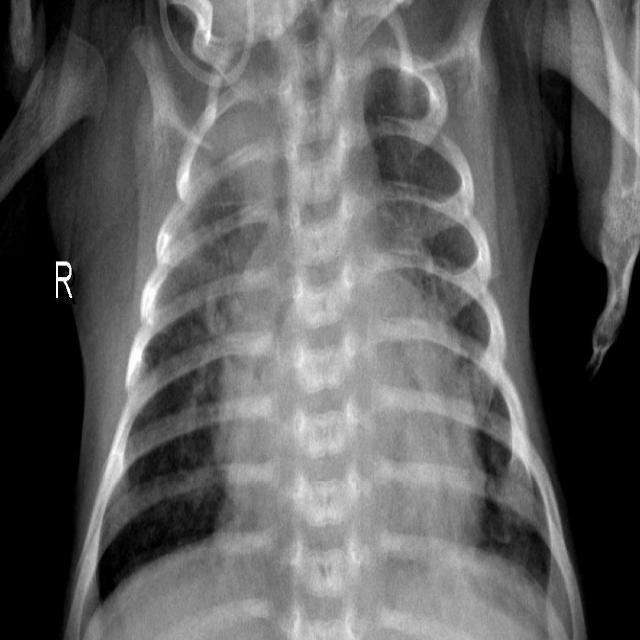

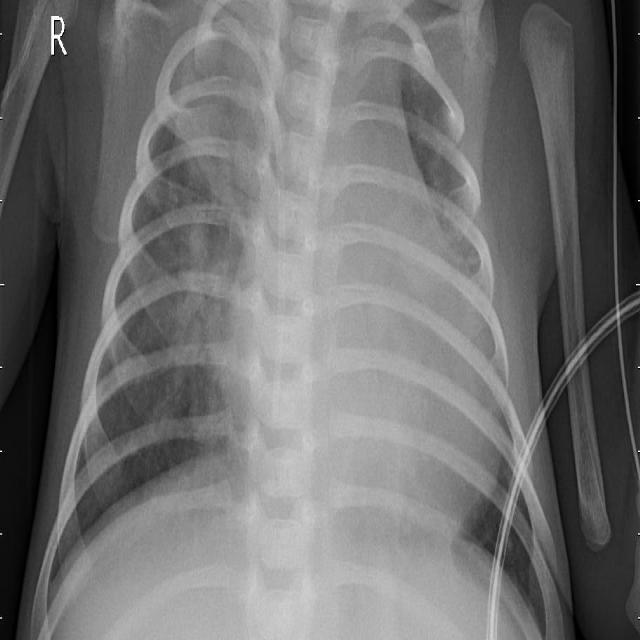

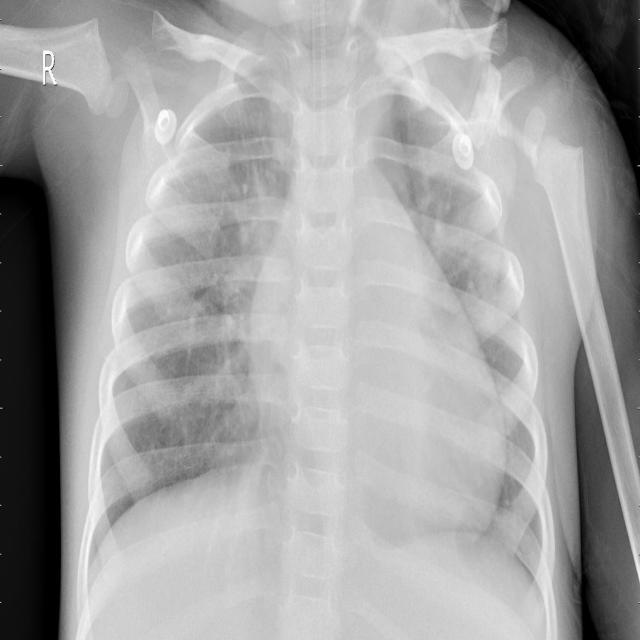

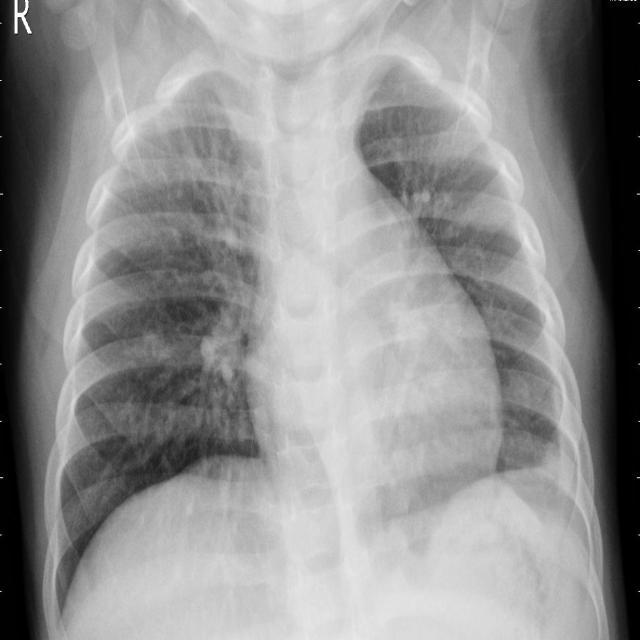

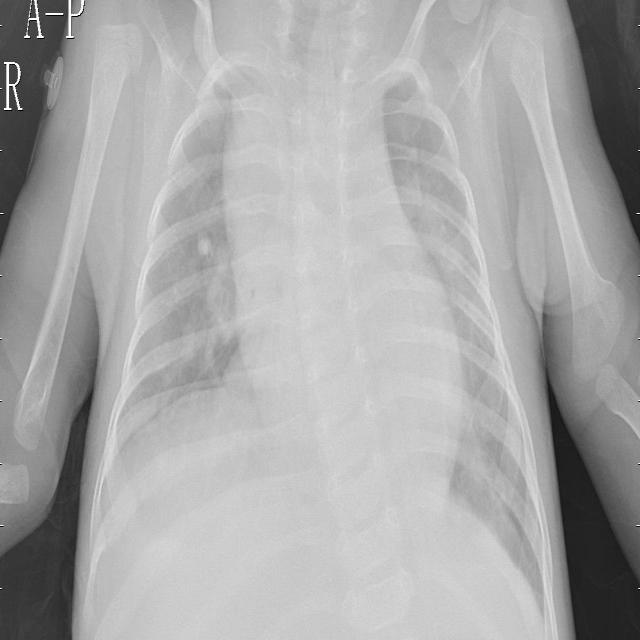

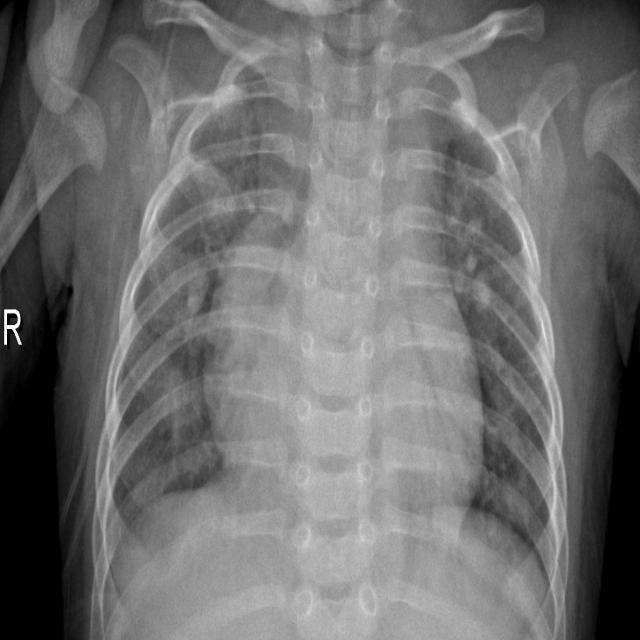

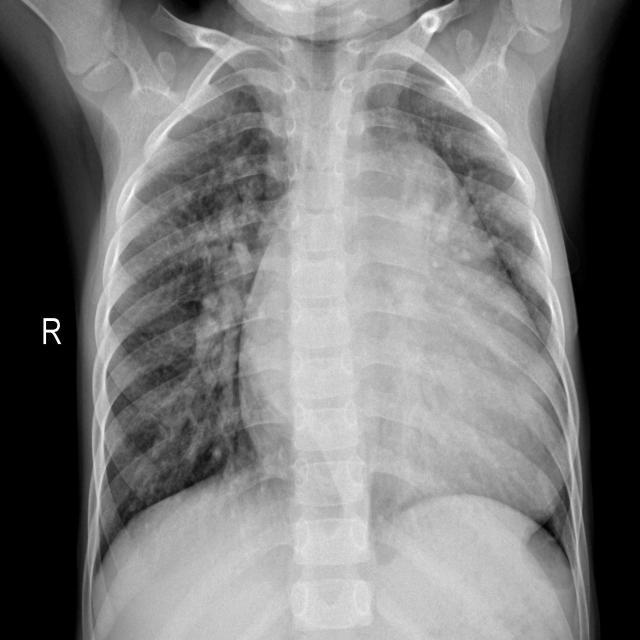

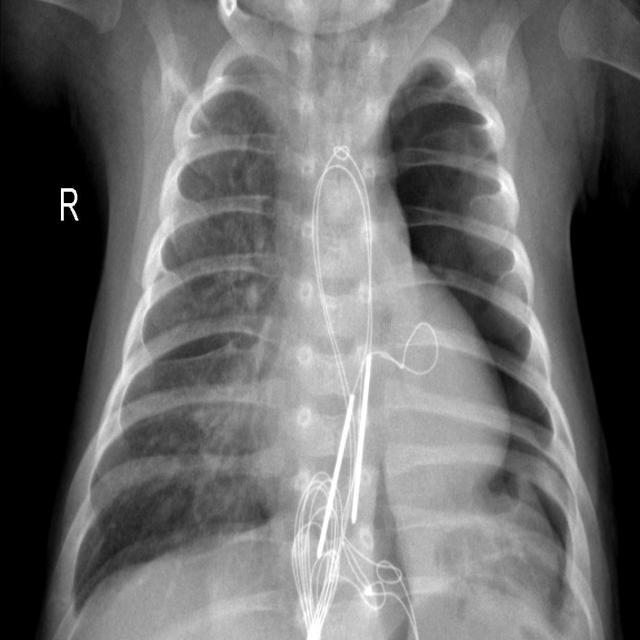

In [11]:
# Let's visualize some images from the dataset.
from IPython.display import display, Image
import glob

for image_path in glob.glob(f'{dataset.location}/test/bacteria/*.jpg')[:8]:
    display(Image(filename=image_path, width=600))
    print("\n")

---
**B. [MATPLOTLIB.IMAGE](https://matplotlib.org/stable/api/imag#e_api.html)**

---

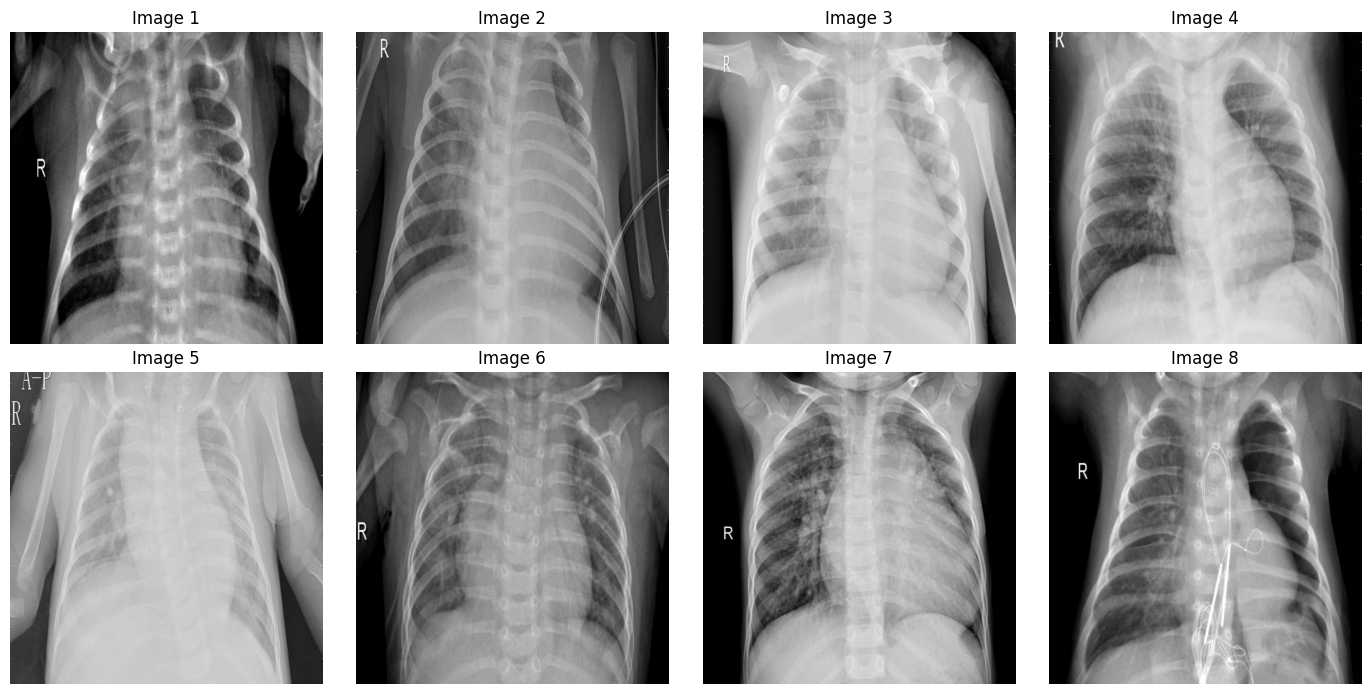

In [12]:
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

---
**C. [PIL/PILLOW](https://pillow.readthedocs.io/en/stable/)**

---

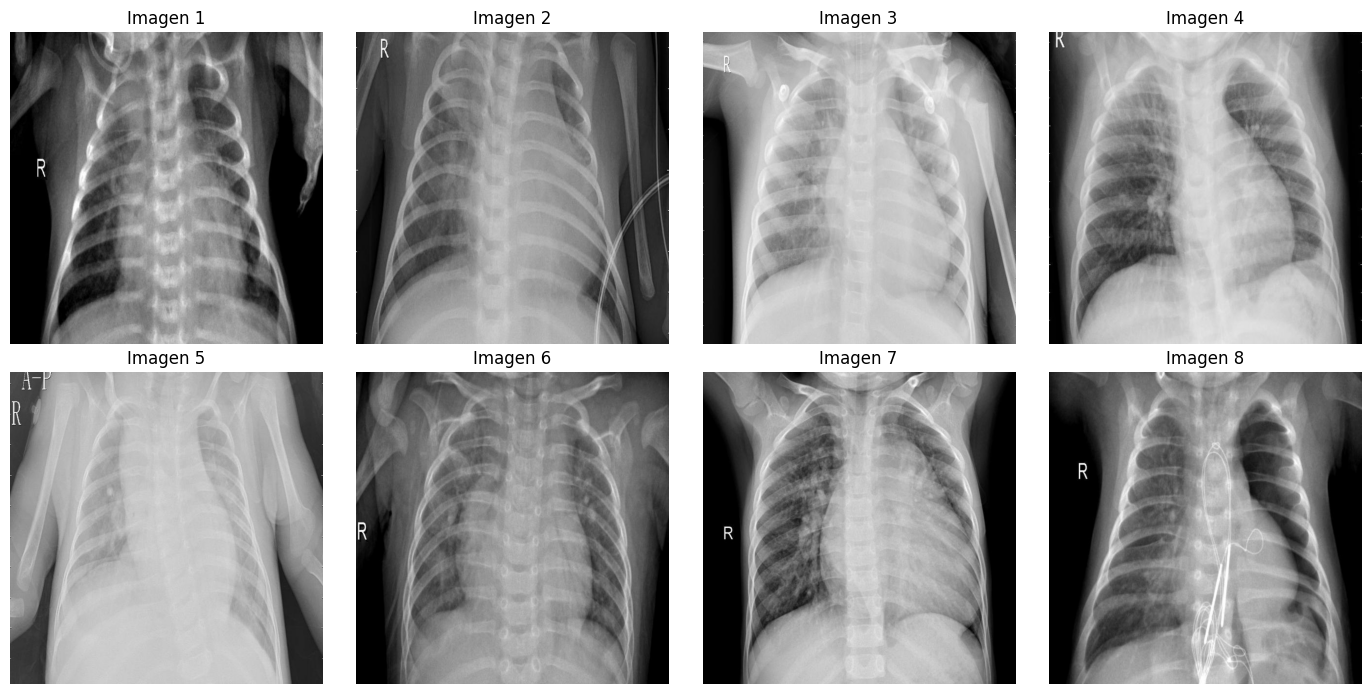

In [13]:
from PIL import Image
import glob
import matplotlib.pyplot as plt


# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = Image.open(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

---
**D. [OpenCV](https://opencv.org/)**

---

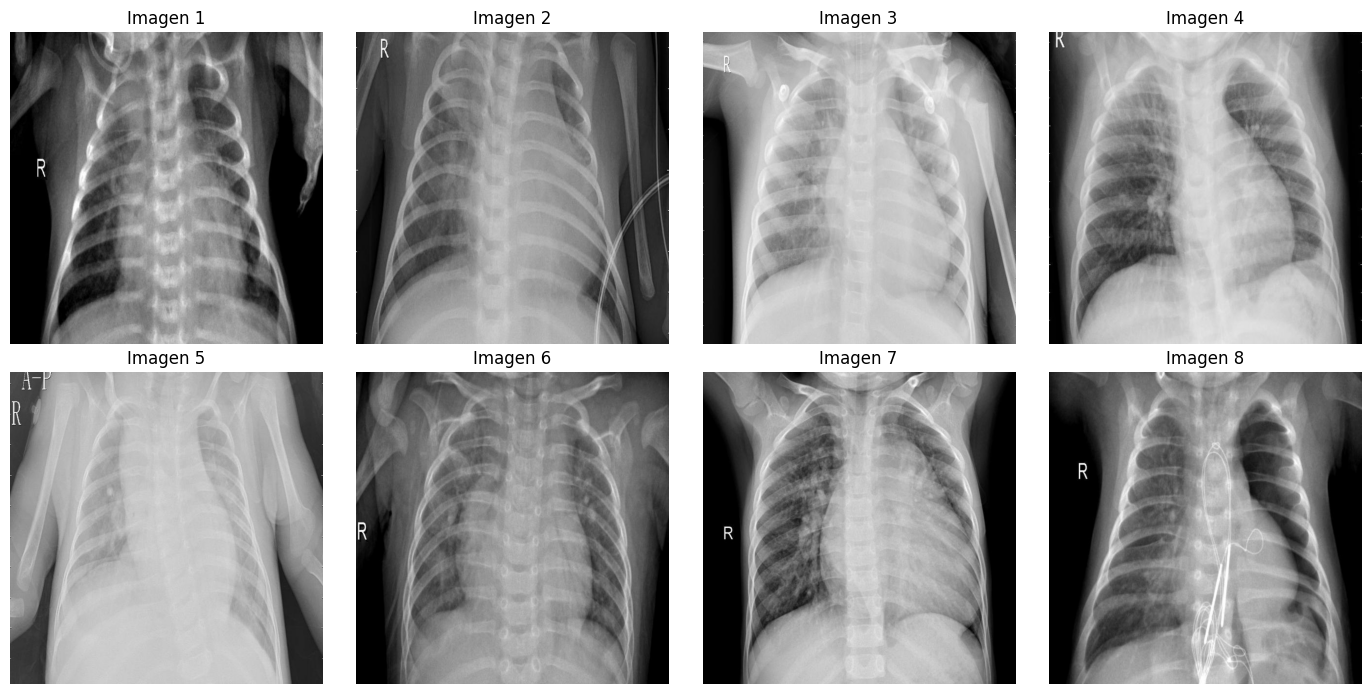

In [14]:
import cv2
import glob
import matplotlib.pyplot as plt


# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

---
**E. [SCIKIT-IMAGE](https://scikit-image.org/)**

---

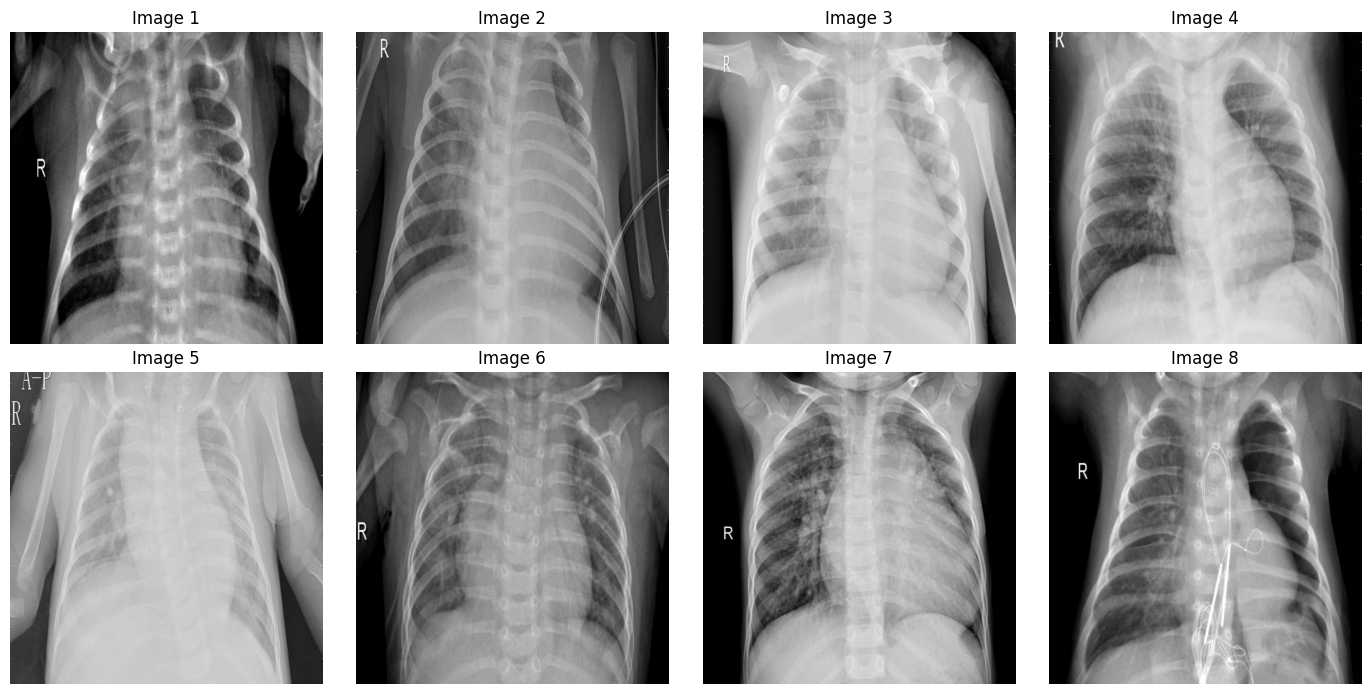

In [15]:
import matplotlib.pyplot as plt
from skimage import io
import glob

# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = io.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


## 3. Trining with ULTRALYTICS YOLOv8

"YOLOv8" is an official version of the YOLO (You Only Look Once) series of object detection models. The YOLO series is known for its constant evolution, with various developments occurring to date.



For updated information on any later version of the YOLO series, I recommend consulting official sources such as the open-source repository on [GitHub](https://github.com/ultralytics) and the associated [documentation](https://docs.ultralytics.com/).

YOLOv8 is the latest version of YOLO (You Only Look Once) developed by Ultralytics. As a state-of-the-art (SOTA) model, YOLOv8 builds upon the success of previous versions, introducing new features and improvements for better performance, flexibility, and efficiency. YOLOv8 supports a wide range of computer vision tasks, including detection, segmentation, pose estimation, tracking, and classification. This versatility allows users to leverage YOLOv8's capabilities across various applications and domains. This means that YOLOv8 is applicable to a variety of tasks in the field of artificial intelligence, such as object detection and tracking, image segmentation, pose estimation, classification, and more. These enhancements and additional features make YOLOv8 a cutting-edge model in the field of computer vision.

Key features and improvements in YOLOv8, according to the provided information, include:

- **Versatility**: YOLOv8 supports a wide variety of computer vision tasks, such as object detection, segmentation, pose estimation, tracking, and classification. This versatility makes it applicable to a wide range of applications and domains.

- **Improved performance**: YOLOv8 likely includes performance improvements compared to its predecessors, which is a common goal in developing new versions. Improved performance may involve higher accuracy, faster inference times, or both.

- **Flexibility**: YOLOv8's flexibility is essential, as it allows users to adapt the model to various tasks and scenarios. The ability to handle different computer vision tasks can be valuable for practical applications.

- **State-of-the-art**: Being a state-of-the-art model suggests that YOLOv8 incorporates the latest advances in object detection and computer vision research.

- **Support for various applications**: YOLOv8's capabilities in different artificial intelligence tasks in vision open possibilities for applications in fields such as autonomous vehicles, surveillance, healthcare, and more.

Understanding the different [modes](https://docs.ultralytics.com/modes) that Ultralytics YOLOv8 supports is critical to getting the most out of your models:

1. Train mode: Fine-tune your model on custom or preloaded datasets.
2. Val mode: A post-training checkpoint to validate model performance.
3. Predict mode: Unleash the predictive power of your model on real-world data.
4. Export mode: Make your model deployment-ready in various formats.
5. Track mode: Extend your object detection model into real-time tracking applications.
6. Benchmark mode: Analyze the speed and accuracy of your model in diverse deployment environments.

The YOLO series stood out for its focus on real-time object detection with a single pass of the neural network through the image, making it very efficient. Previous YOLO models, such as YOLOv3, YOLOv4, and YOLOv5, were known for their performance and accuracy in detecting objects in images and videos.

#### [Classification](https://docs.ultralytics.com/tasks/classify/)

Image classification is the simplest task of the three and involves classifying a whole image into one of a set of predefined classes.

The output of an image classifier is a single class label and a confidence score. Image classification is useful when you only need to know which class an image belongs to and do not need to know the exact location of objects of that class or their precise shape.

The YOLOv8 models for classification use the suffix `"-cls"`, for example, "yolov8n-cls.pt," and are pretrained on [ImageNet](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/ImageNet.yaml).


---
**Training the dataset**

---

In [17]:
# Return to HOME from the dataset directory
os.chdir(HOME)
print(os.getcwd())

# Start training. If ".pt" does not exist in the current directory, it will be downloaded.
model = YOLO('yolov8n-cls.pt') # nano-classification model.

classification_train = model.train(data=f'{dataset.location}', epochs=25, save=True) # imgsz=256,

/content
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/chest-xray-image_s-1, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/datasets/chest-xray-image_s-1/train... 7606 images, 0 corrupt: 100%|██████████| 7606/7606 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/chest-xray-image_s-1/test... 545 images, 0 corrupt: 100%|██████████| 545/545 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all      0.725          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.84it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.78it/s]

                   all      0.782          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      10/25     0.396G     0.3905          6        224: 100%|██████████| 476/476 [01:32<00:00,  5.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      11/25     0.396G     0.3825          6        224: 100%|██████████| 476/476 [01:27<00:00,  5.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


      12/25     0.396G     0.3598          6        224: 100%|██████████| 476/476 [01:26<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


      13/25     0.396G     0.3491          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.60it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


      14/25     0.396G     0.3402          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.65it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


      15/25     0.396G     0.3275          6        224: 100%|██████████| 476/476 [01:26<00:00,  5.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]

                   all      0.828          1



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem       loss  Instances       Size


      16/25     0.396G     0.3136          6        224: 100%|██████████| 476/476 [01:27<00:00,  5.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.69it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


      17/25     0.396G     0.3057          6        224: 100%|██████████| 476/476 [01:26<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


      18/25     0.396G     0.2853          6        224: 100%|██████████| 476/476 [01:24<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


      19/25     0.396G     0.2793          6        224: 100%|██████████| 476/476 [01:24<00:00,  5.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.44it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


      20/25     0.396G     0.2808          6        224: 100%|██████████| 476/476 [01:24<00:00,  5.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:06<00:00,  3.00it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


      21/25     0.396G     0.2672          6        224: 100%|██████████| 476/476 [01:23<00:00,  5.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


      22/25     0.396G     0.2472          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.28it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


      23/25     0.396G     0.2445          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


      24/25     0.396G      0.247          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


      25/25     0.396G     0.2413          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.11it/s]

                   all      0.811          1



25 epochs completed in 0.642 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/chest-xray-image_s-1/train... found 7606 images in 3 classes ✅ 
val: None...
test: /content/datasets/chest-xray-image_s-1/test... found 545 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]


                   all      0.842          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


What this process does is that YOLOv8 is trained on the `train` subset and validated against `test`. Each time it's trained, we get a subfolder with the results (train, train2, train3, etc.) in the `runs` folder. Let's imagine that after several trials, we have decided that the best training is in train2.

We also see that we have different results for train2 and two saved network models in weights, the best (`best.pt`) and the last (`last.pt`). Finally, the training uses the best training model for a final validation with `best.pt`. Let's see what results train2 provides.


---
**`Classification_train.save_dir` is where the classification results are saved.**

---

In [19]:
print(classification_train.save_dir)

runs/classify/train2


`classify_train.save_dir` holds the last directory where the training results were saved, but sometimes it's better to use a previous training, so instead of using `classify_train.save-dir`, we're going to use a slight modification that allows us to "manually" use any training result.

---
**Displaying training results**

---

In [20]:
classify_train_save_dir= os.path.join(HOME,'runs/classify/train2')

print(os.listdir(classify_train_save_dir),'\n')

!ls -la {classify_train_save_dir}

['train_batch7141.jpg', 'train_batch2.jpg', 'val_batch2_pred.jpg', 'results.png', 'val_batch1_pred.jpg', 'train_batch0.jpg', 'train_batch1.jpg', 'results.csv', 'confusion_matrix_normalized.png', 'args.yaml', 'train_batch7142.jpg', 'train_batch7140.jpg', 'val_batch1_labels.jpg', 'events.out.tfevents.1722244973.7b1770d86e32.497.1', 'val_batch0_pred.jpg', 'weights', 'val_batch0_labels.jpg', 'confusion_matrix.png', 'val_batch2_labels.jpg'] 

total 1804
drwxr-xr-x 3 root root   4096 Jul 29 10:01 .
drwxr-xr-x 4 root root   4096 Jul 29 09:22 ..
-rw-r--r-- 1 root root   1562 Jul 29 09:22 args.yaml
-rw-r--r-- 1 root root 113402 Jul 29 10:01 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 104165 Jul 29 10:01 confusion_matrix.png
-rw-r--r-- 1 root root 129202 Jul 29 10:02 events.out.tfevents.1722244973.7b1770d86e32.497.1
-rw-r--r-- 1 root root   4992 Jul 29 10:01 results.csv
-rw-r--r-- 1 root root 130724 Jul 29 10:01 results.png
-rw-r--r-- 1 root root 112175 Jul 29 09:22 train_batch0.jpg
-

---
**print results.csv**

---

In [21]:
!cat {classify_train_save_dir}/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 0.7699,                0.72477,                      1,                0.81274,              0.0002375,              0.0002375,              0.0002375
                      2,                 0.5734,                0.79266,                      1,                0.81272,             0.00045667,             0.00045667,             0.00045667
                      3,                0.52939,                0.79083,                      1,                0.76685,             0.00065699,             0.00065699,             0.00065699
                      4,                0.50328,                0.78165,                      1,                0.78144,             0.00062918,             0.00062918,             0.00062918
                      5,                

The command `!cat {classify_train_save_dir}/results.csv | head -10` is used to display the first 10 lines of the `results.csv` file located in the directory specified by `classify_train_save_dir`.

The partial output is the first 10 lines of this CSV file, which is a training logs from our model training process. Below is a detailed explanation of each column in the output:

1. **epoch**: Indicates the training epoch, which is a single pass through the entire training dataset.
2. **train/loss**: The loss value on the training dataset for that epoch. Lower values indicate a better fit of the model to the training data.
3. **metrics/accuracy_top1**: The top-1 accuracy on the training dataset. This measures how often the model's top prediction (the class with the highest predicted probability) matches the true class label.
4. **metrics/accuracy_top5**: The top-5 accuracy on the training dataset. This measures how often the true class label is within the top 5 predicted probabilities.
5. **val/loss**: The loss value on the validation dataset for that epoch. It helps in understanding how well the model is generalizing to unseen data.
6. **lr/pg0, lr/pg1, lr/pg2**: Learning rates for different parameter groups of the model. Learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

For example:

- **Epoch 1**:
  - Train Loss: 0.7699
  - Top-1 Accuracy: 72.477%
  - Top-5 Accuracy: 100%
  - Validation Loss: 0.81274
  - Learning Rates: 0.0002375 for all parameter groups

- **Epoch 2**:
  - Train Loss: 0.5734
  - Top-1 Accuracy: 79.266%
  - Top-5 Accuracy: 100%
  - Validation Loss: 0.81272
  - Learning Rates: 0.00045667 for all parameter groups

The trend in the data suggests that the training loss is decreasing over epochs, which is generally a good sign of the model learning. The top-1 accuracy is increasing, indicating better performance on the training data. The learning rates are adjusted as training progresses.


---
**print results.csv with pandas**

---

In [ ]:
import pandas as pd

# Read CSV file in a Pandas DataFrame
df = pd.read_csv(f'{classify_train_save_dir}/results.csv')
df.head(10)
# Display the first 10 records
print(df.head(10))

                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  0.17415                  0.80513   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                        1                   0.3892                 0.000238   

                    lr/pg1                   lr/pg2  
0                 0.000238                 0.000238  


---
**Print confusion matrix and confusion matrix normalized**

---

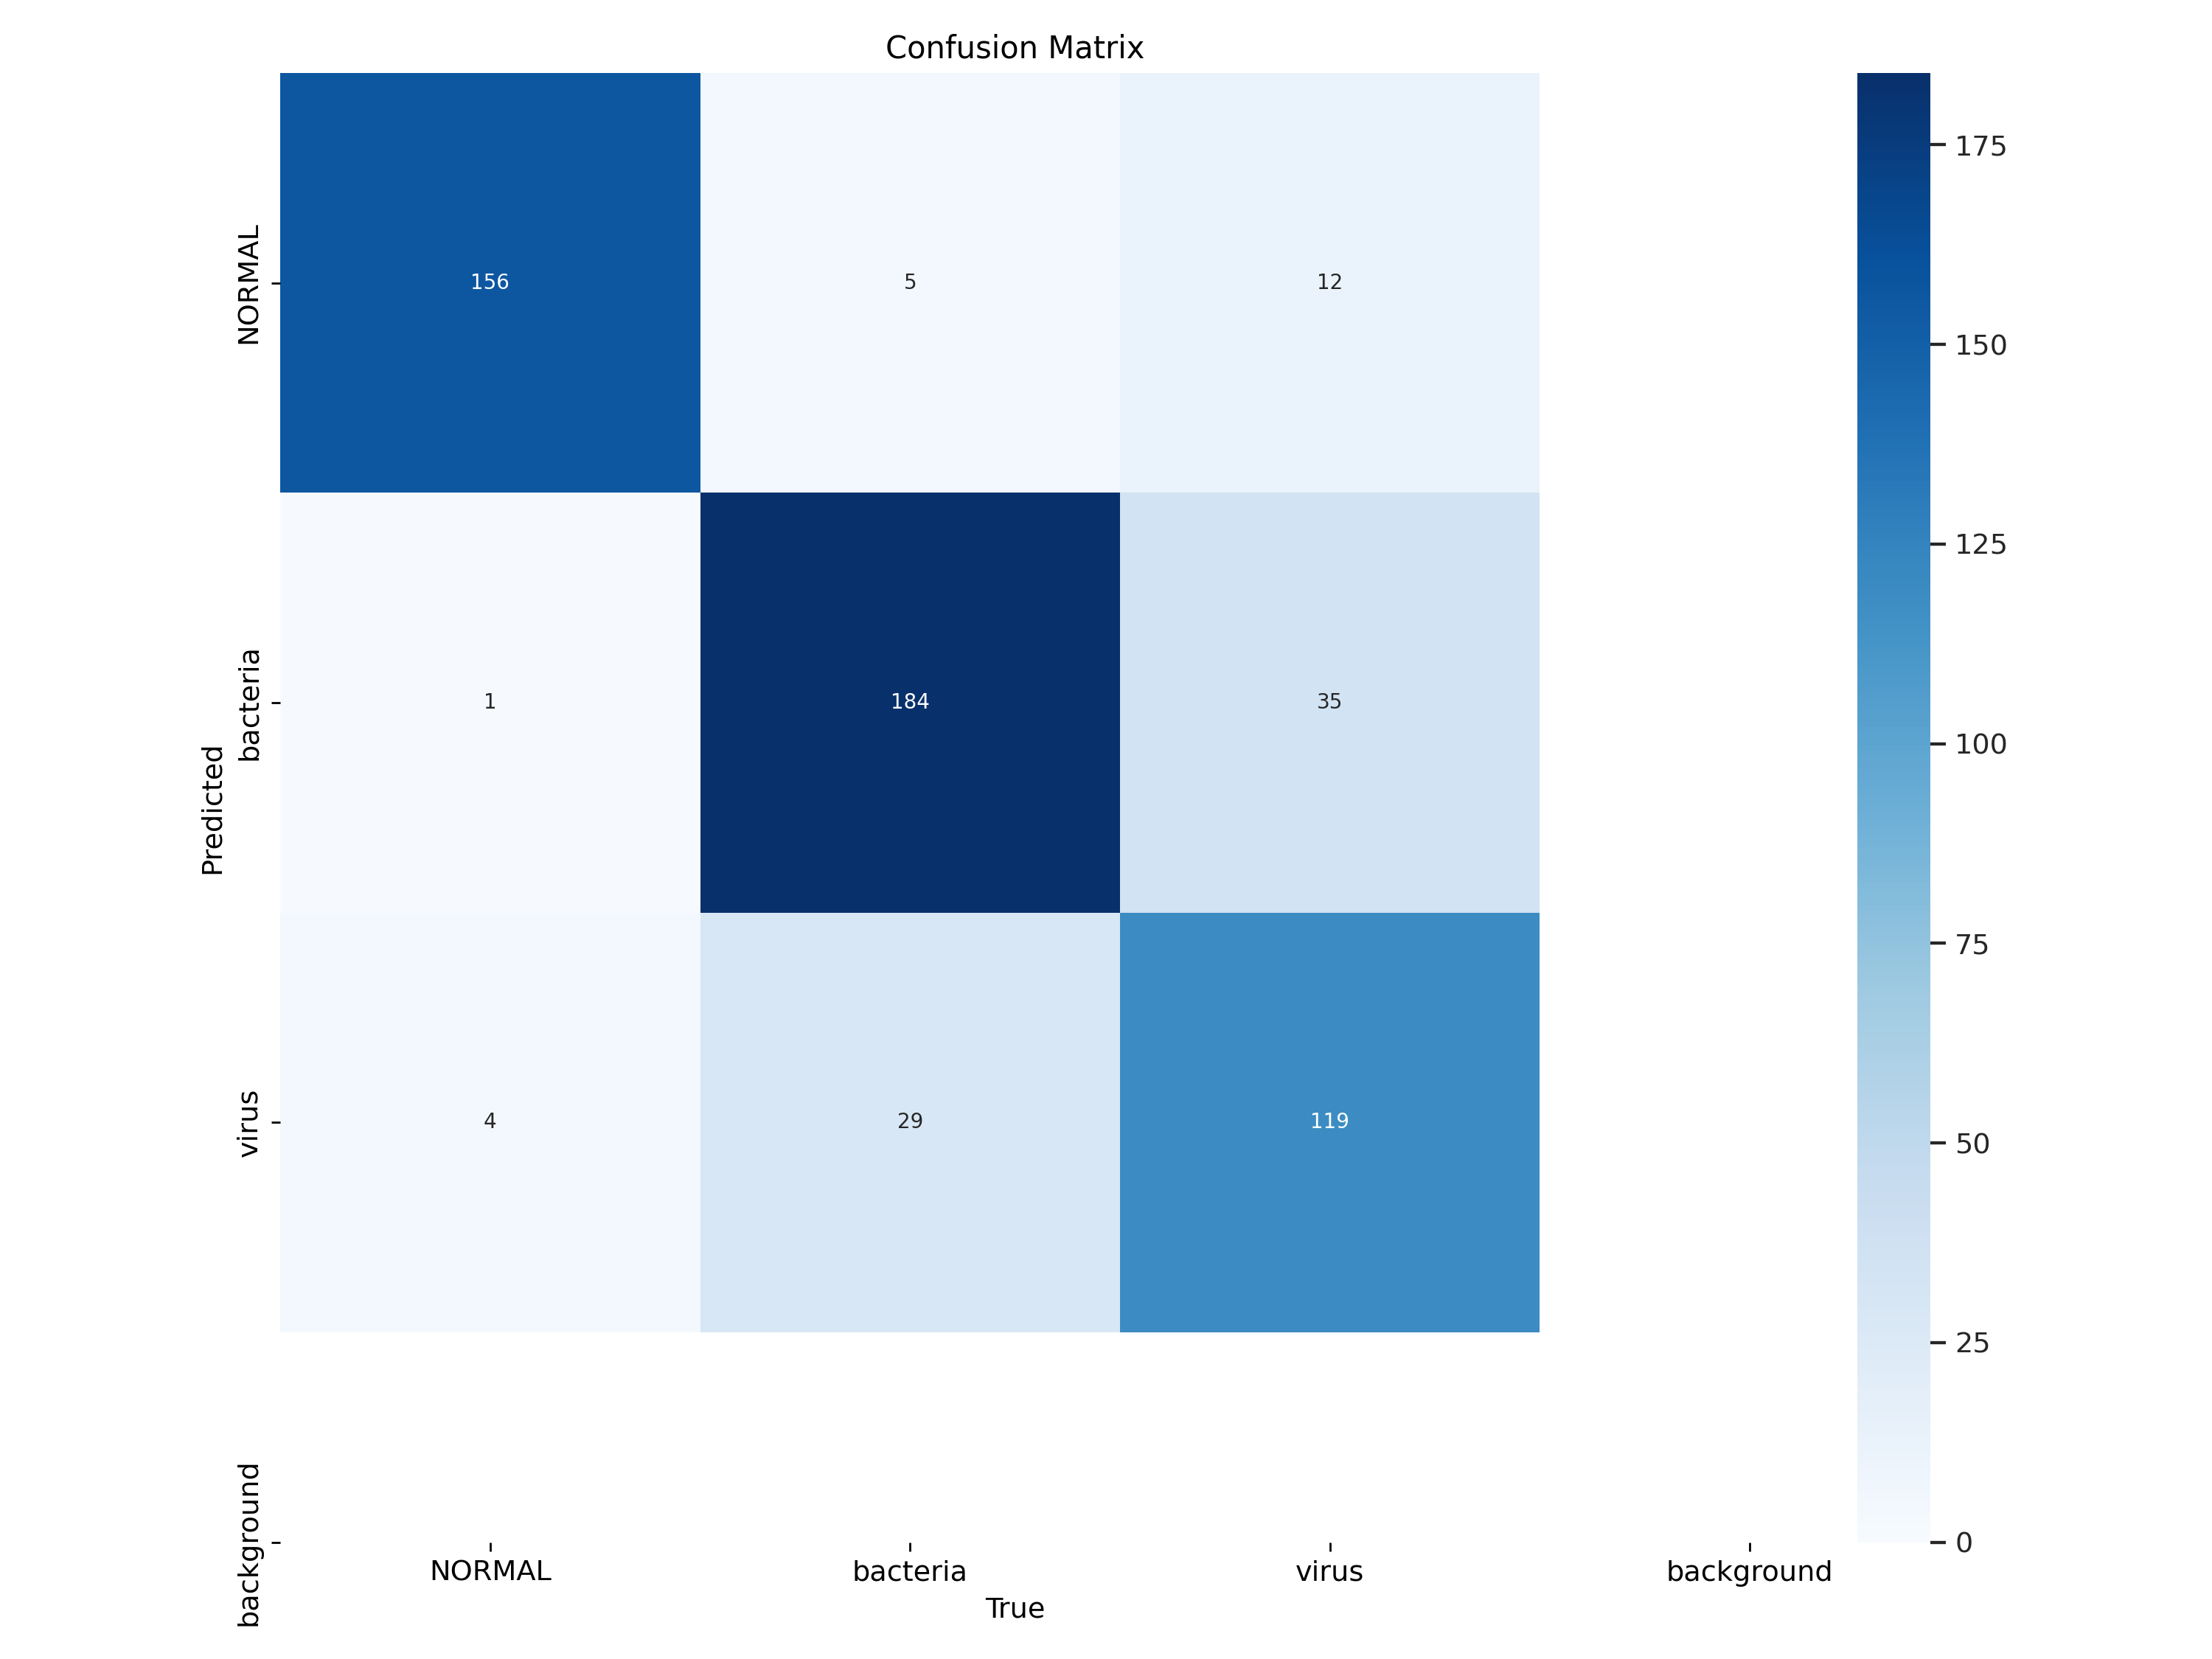

In [25]:
from IPython.display import display, Image

Image(filename=f'{classify_train_save_dir}/confusion_matrix.png',width=600)

A confusion matrix is a performance measurement tool for evaluating the performance of a classification algorithm. It shows the relationship between the actual labels and the predicted labels by the classifier. Each row of the matrix represents the instances of the actual class, while each column represents the instances of the predicted class.

### Components of a Confusion Matrix

Let's consider a binary classification problem (two classes: positive and negative):

```
           Predicted Negative (N)   Predicted Positive (P)
Actual N          TN                     FP
Actual P          FN                     TP
```

Where:
- **TN (True Negative)**: The number of instances that were correctly classified as negative.
- **FP (False Positive)**: The number of instances that were incorrectly classified as positive.
- **FN (False Negative)**: The number of instances that were incorrectly classified as negative.
- **TP (True Positive)**: The number of instances that were correctly classified as positive.

### Interpretation of the Confusion Matrix

From the confusion matrix, several important performance metrics can be derived:

1. **Accuracy**: The ratio of correctly predicted instances (both true positives and true negatives) to the total instances.
   
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
   
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the all observations in the actual class.
   
  $$
   \text{Recall} = \frac{TP}{TP + FN}
  $$

4. **F1 Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns.
   
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Specificity**: The ratio of correctly predicted negative observations to all observations in the actual negative class.
   
   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$

A confusion matrix provides a detailed breakdown of the classifier's performance, highlighting where it gets confused between different classes. By analyzing the confusion matrix, one can identify patterns of misclassification and potentially improve the model's performance.

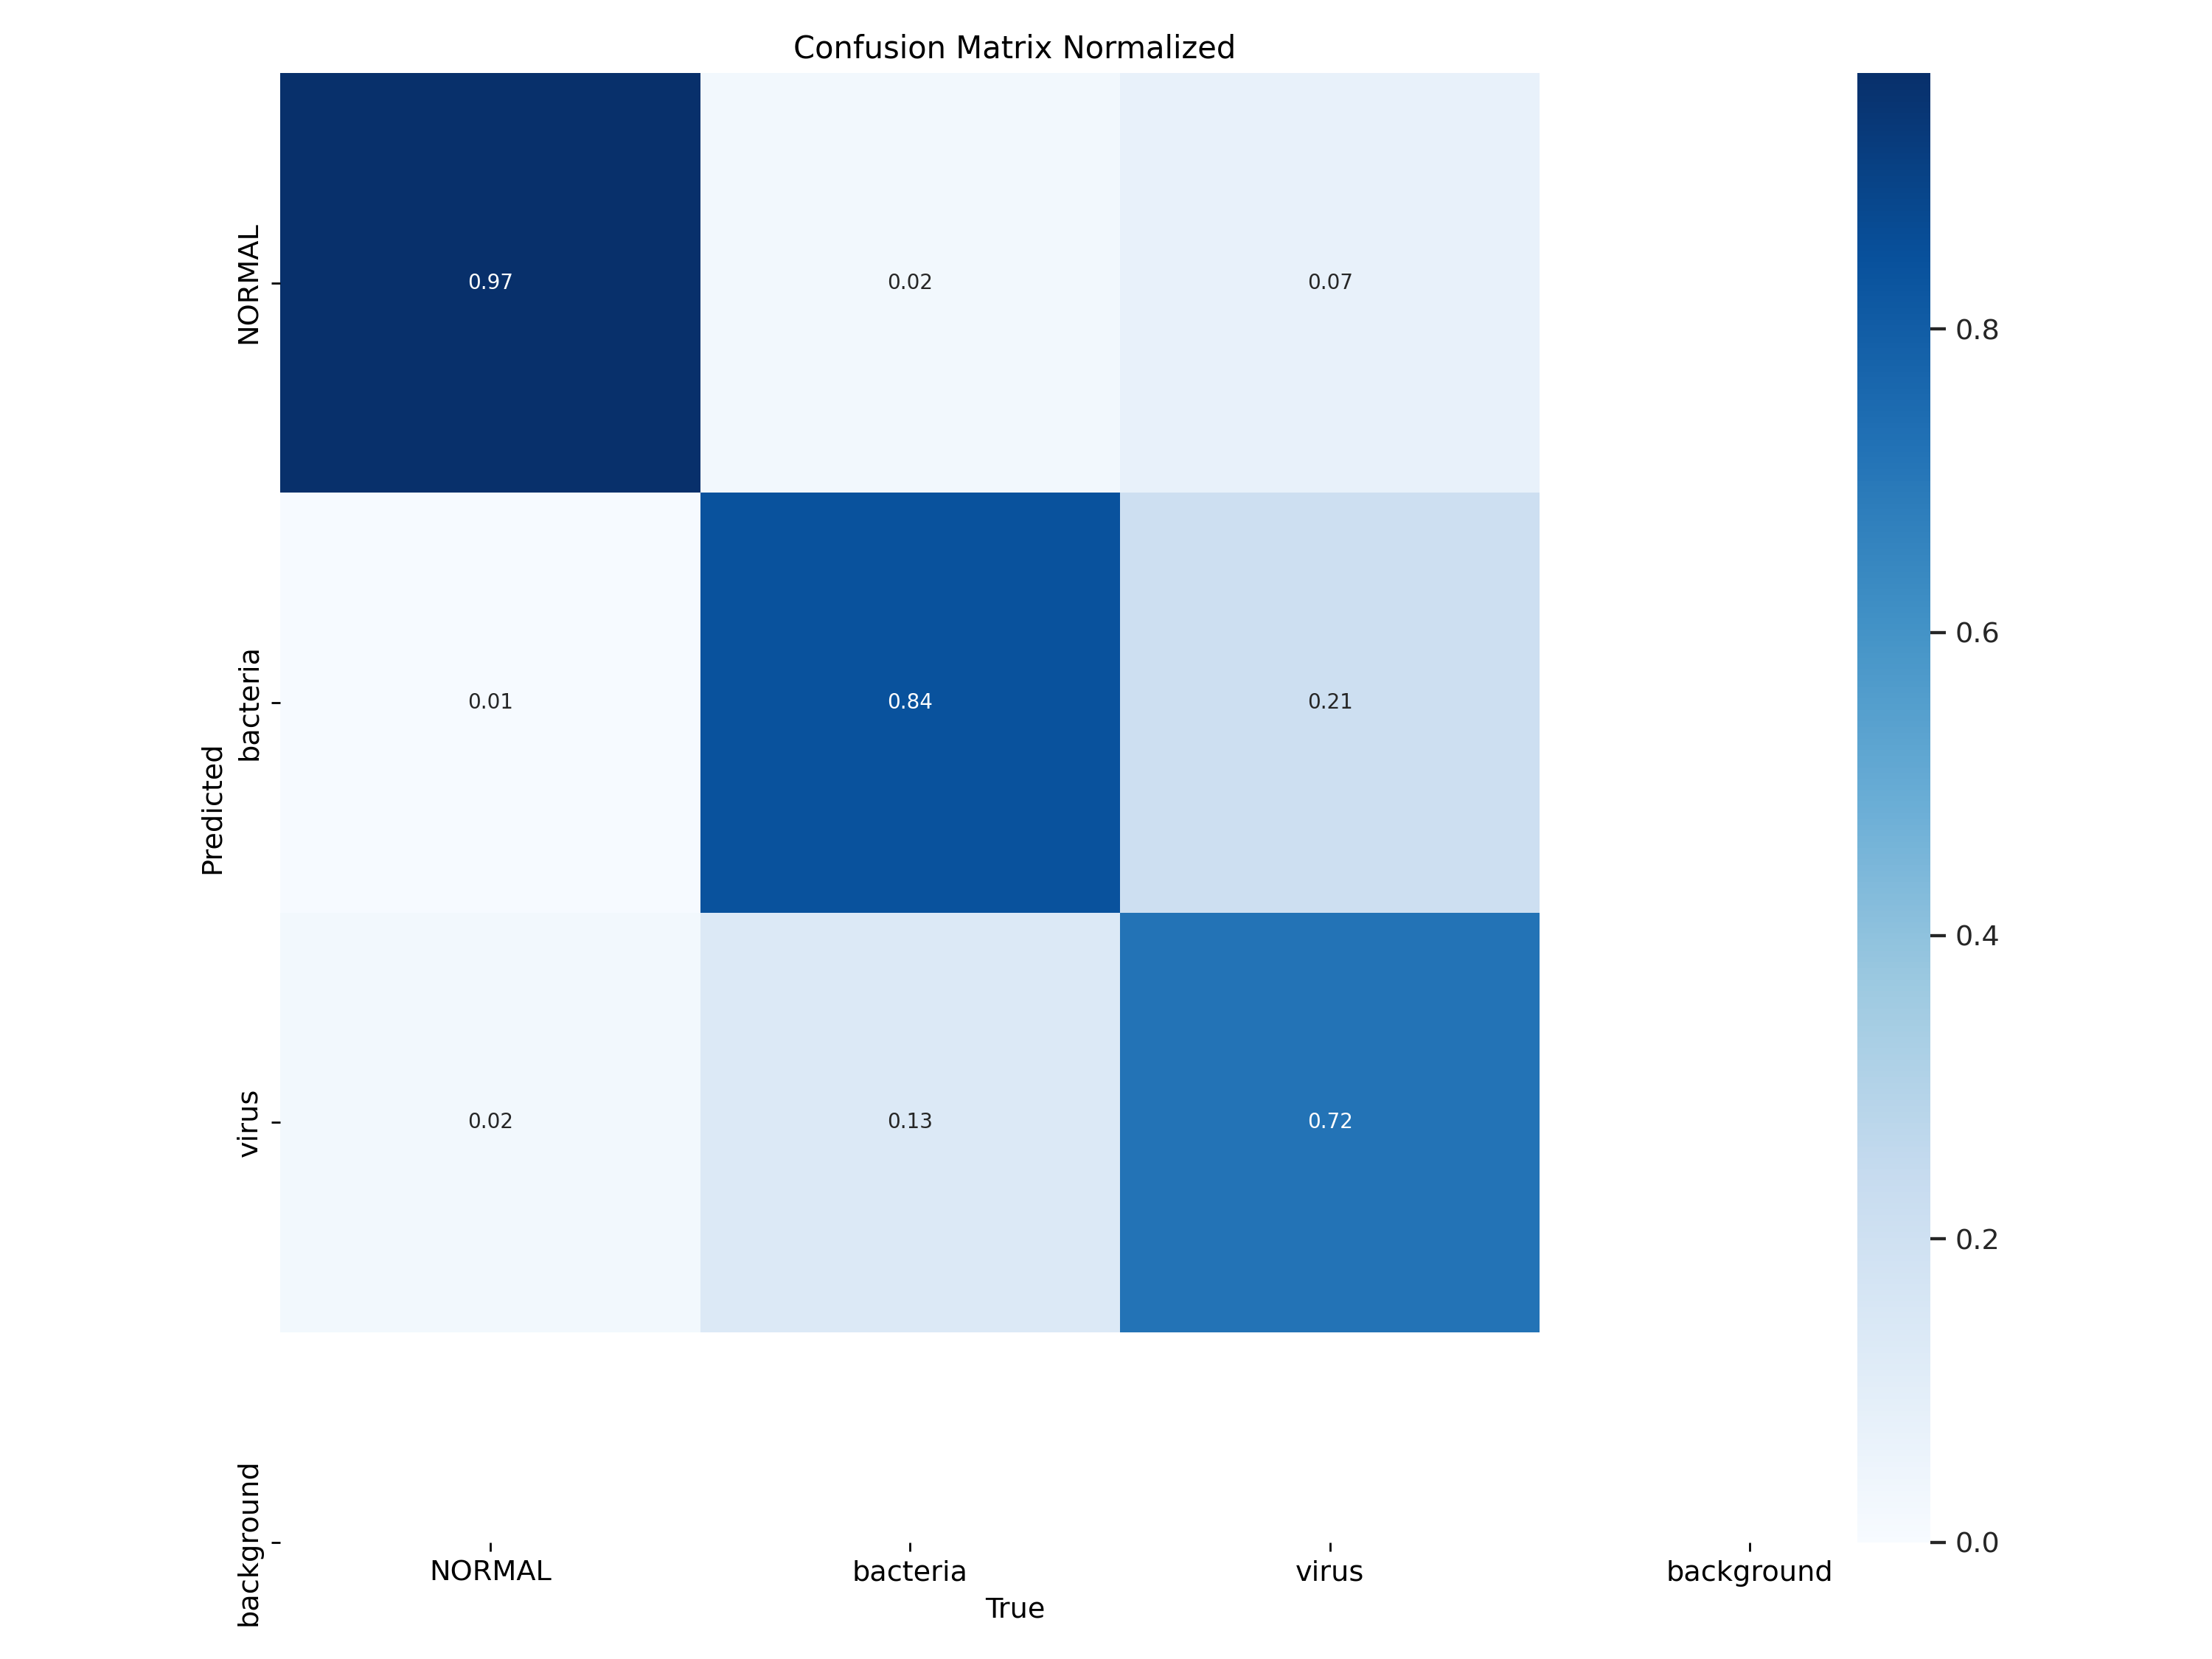

In [26]:
Image(filename=f'{classify_train_save_dir}/confusion_matrix_normalized.png',width=600)

A normalized confusion matrix is a variant of the confusion matrix where the values are normalized, usually to show the relative frequencies of the predictions rather than absolute counts. This normalization helps to compare the performance of a classifier more easily, especially when dealing with imbalanced datasets where some classes may have more samples than others.

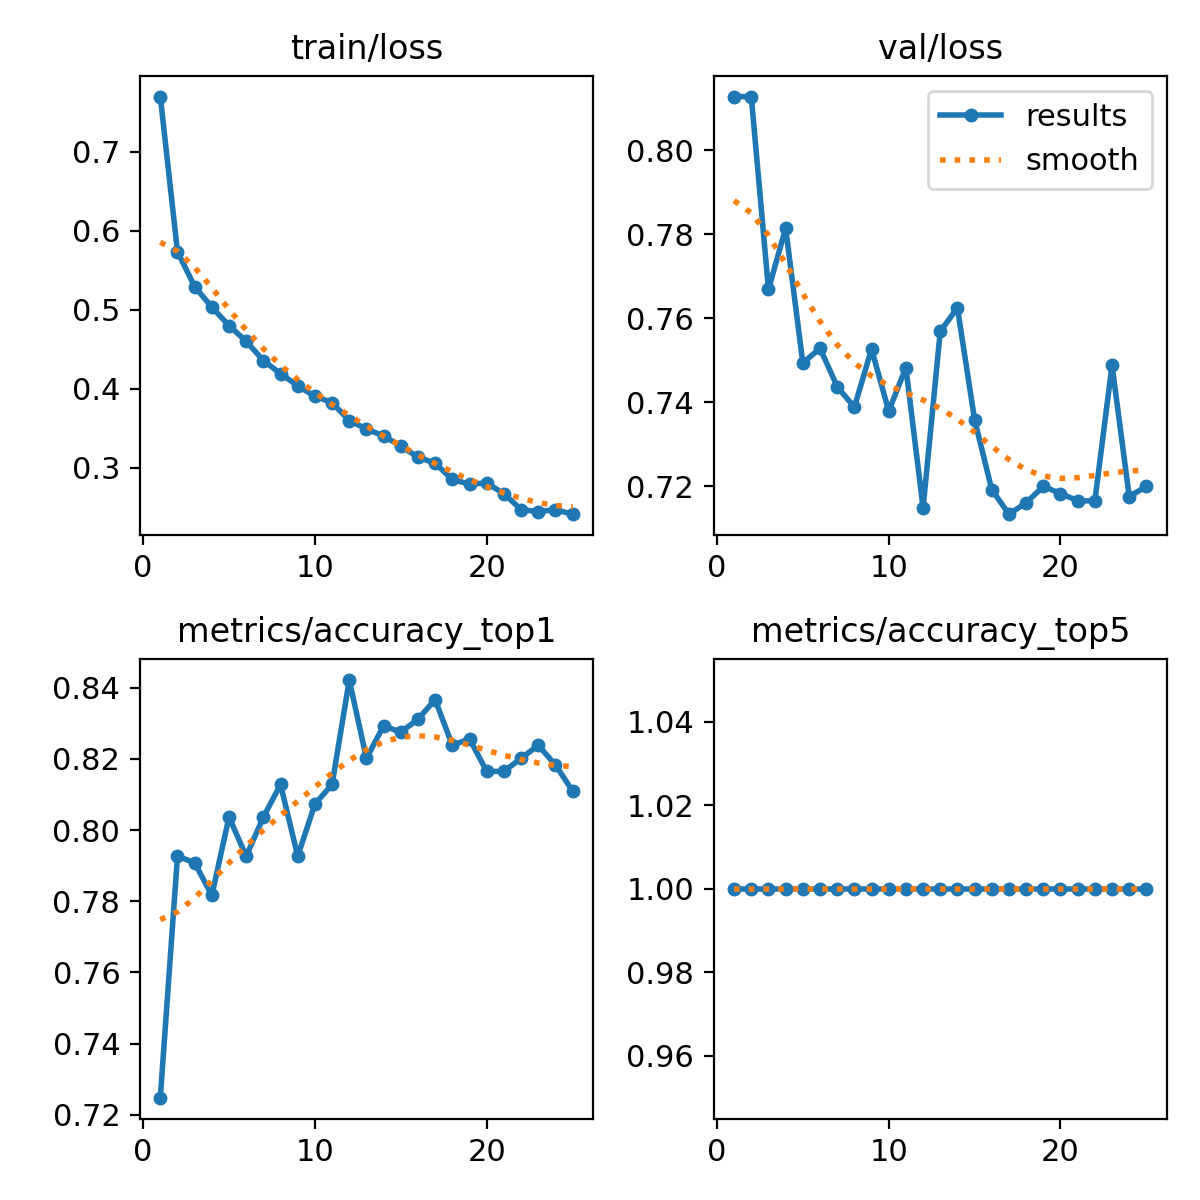

In [27]:
Image(filename=f'{classify_train_save_dir}/results.png',width=600)

---
**Display some examples** (batch1)

---

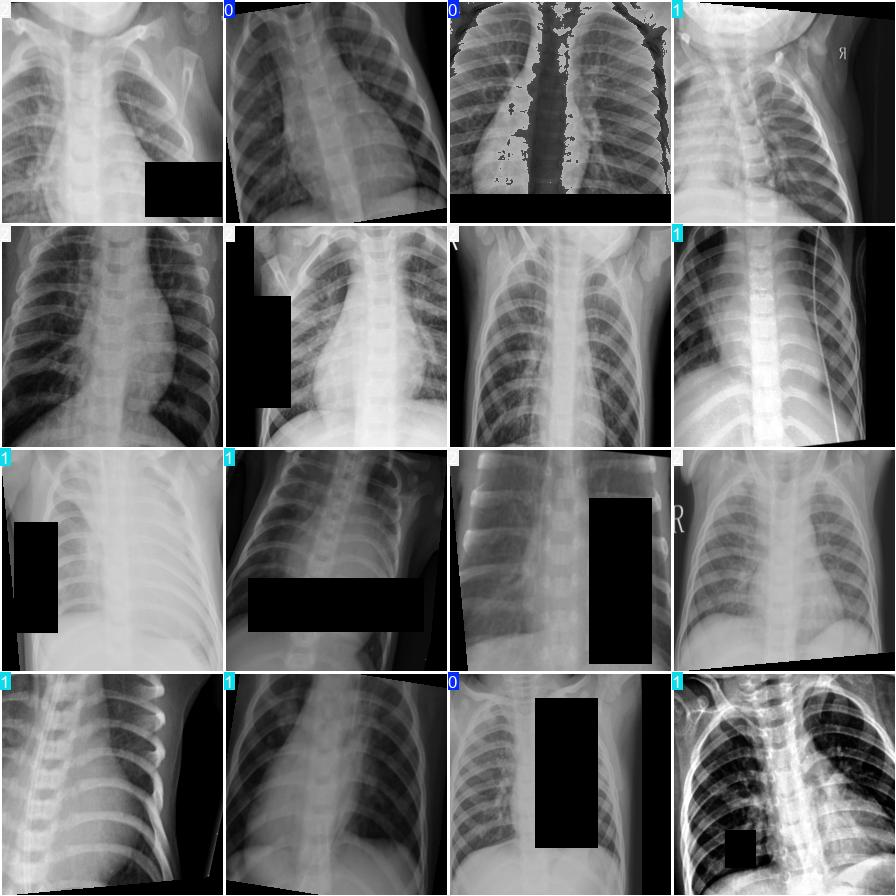

In [28]:
Image(filename=f'{classify_train_save_dir}/train_batch1.jpg',width=600)

---
**Display some example (val_batch1 labels vs pred_batch1 labels)**

---

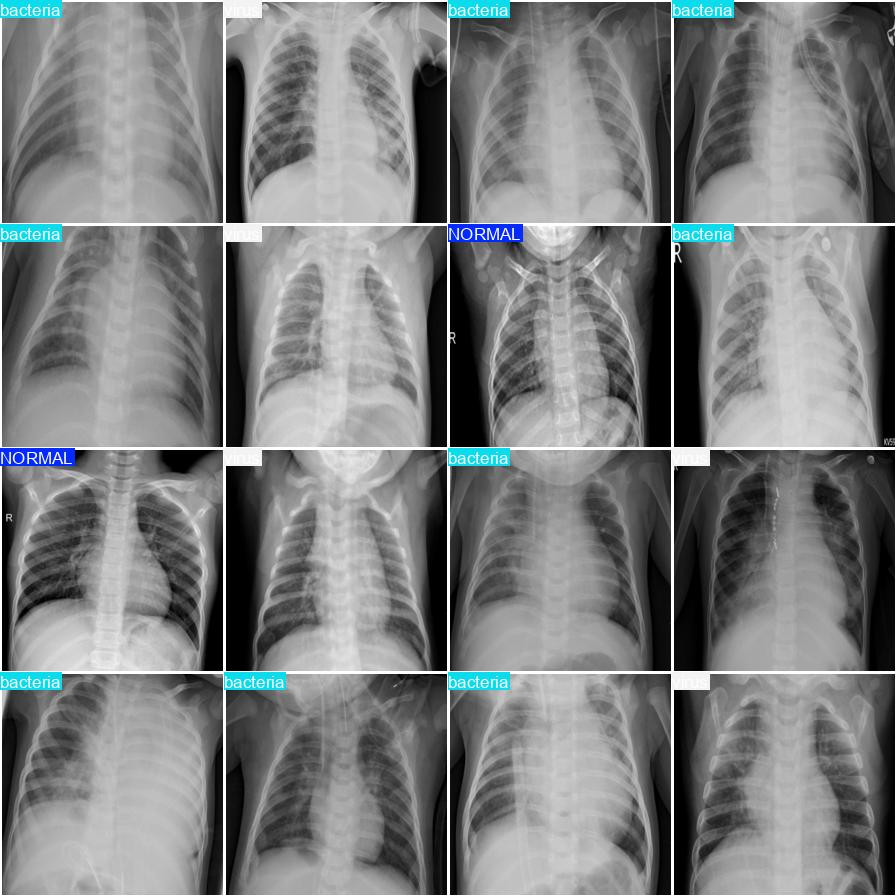

In [31]:
Image(filename=f'{classify_train_save_dir}/val_batch1_labels.jpg',width=600)

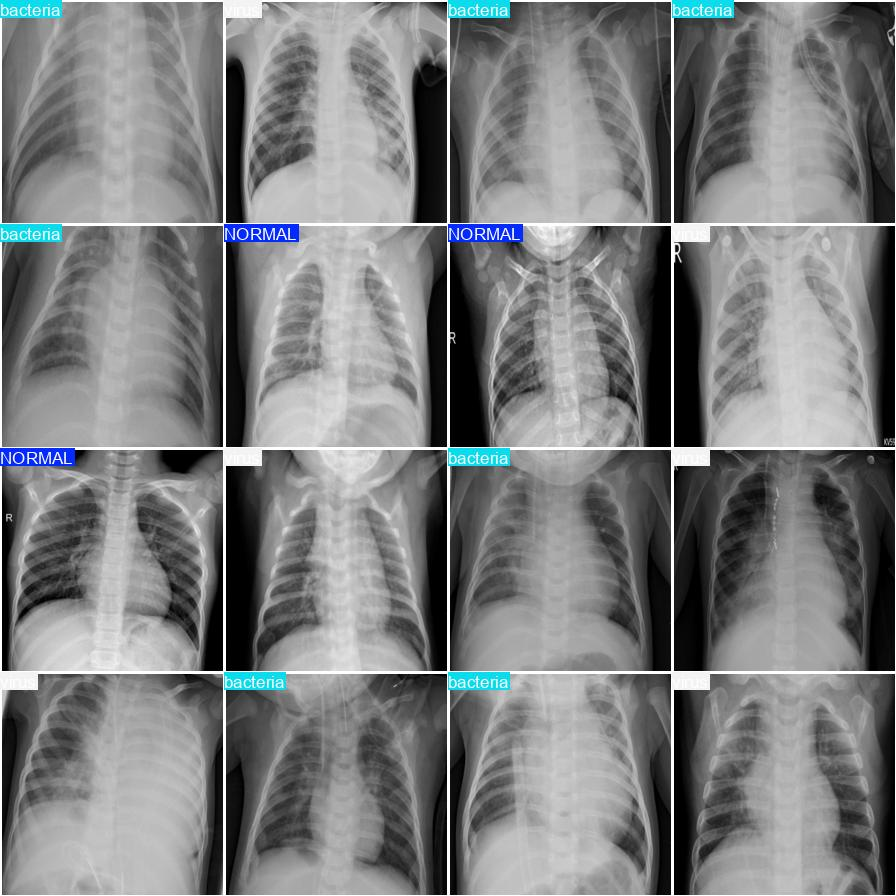

In [32]:
Image(filename=f'{classify_train_save_dir}/val_batch1_pred.jpg',width=600)

In [ ]:
""" # We can, instead of training locally as we have done, use the model already
# trained by roboflow and infer locally.

from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace().project("license-plate-recognition-rxg4e")
model = project.version(4).model.download('roboflow.pt')
 """

' # Podemos, en lugar de entrenar en local como hemos hecho, utilizar el modelo ya\n# entrenado y subido a roboflow e inferir en local. \n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")\nproject = rf.workspace().project("license-plate-recognition-rxg4e")\nmodel = project.version(4).model.download(\'roboflow.pt\')\n '

In [ ]:

# infer on a local image
#print(model.predict("your_image.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())


## 5. Validation

We have used the train and test subsets to train YOLOv8. We are going to take the best weights obtained in training (train2) and use them to evaluate the model using the `val` mode (as opposed to the `classify`, `train`, or `detect` modes). The `val` mode uses a `val` dataset that has not been used as a dataset during training (it uses train and test). The results provided by the validation are the true metrics of the model that should concern us.

In [36]:
from ultralytics import YOLO

model = YOLO(f'{classify_train_save_dir}/weights/best.pt') #load my custom model

classify_val = model.val(data=f'{dataset.location}', save=True) #imgsz=256

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/chest-xray-image_s-1/train... found 7606 images in 3 classes ✅ 
val: /content/datasets/chest-xray-image_s-1/val... found 1095 images in 3 classes ✅ 
test: /content/datasets/chest-xray-image_s-1/test... found 545 images in 3 classes ✅ 


val: Scanning /content/datasets/chest-xray-image_s-1/val... 1095 images, 0 corrupt: 100%|██████████| 1095/1095 [00:00<00:00, 4518.55it/s]

val: New cache created: /content/datasets/chest-xray-image_s-1/val.cache



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
               classes   top1_acc   top5_acc: 100%|██████████| 69/69 [00:12<00:00,  5.63it/s]


                   all      0.828          1
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3


In [38]:
#classify_val_save_dir = classify_val.save_dir
classify_val_save_dir= 'runs/classify/val3'
!ls -la {classify_val_save_dir}

total 896
drwxr-xr-x 2 root root   4096 Jul 29 10:40 .
drwxr-xr-x 7 root root   4096 Jul 29 10:40 ..
-rw-r--r-- 1 root root 113159 Jul 29 10:40 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 104118 Jul 29 10:40 confusion_matrix.png
-rw-r--r-- 1 root root 113813 Jul 29 10:40 val_batch0_labels.jpg
-rw-r--r-- 1 root root 113800 Jul 29 10:40 val_batch0_pred.jpg
-rw-r--r-- 1 root root 109311 Jul 29 10:40 val_batch1_labels.jpg
-rw-r--r-- 1 root root 109582 Jul 29 10:40 val_batch1_pred.jpg
-rw-r--r-- 1 root root 117256 Jul 29 10:40 val_batch2_labels.jpg
-rw-r--r-- 1 root root 117834 Jul 29 10:40 val_batch2_pred.jpg


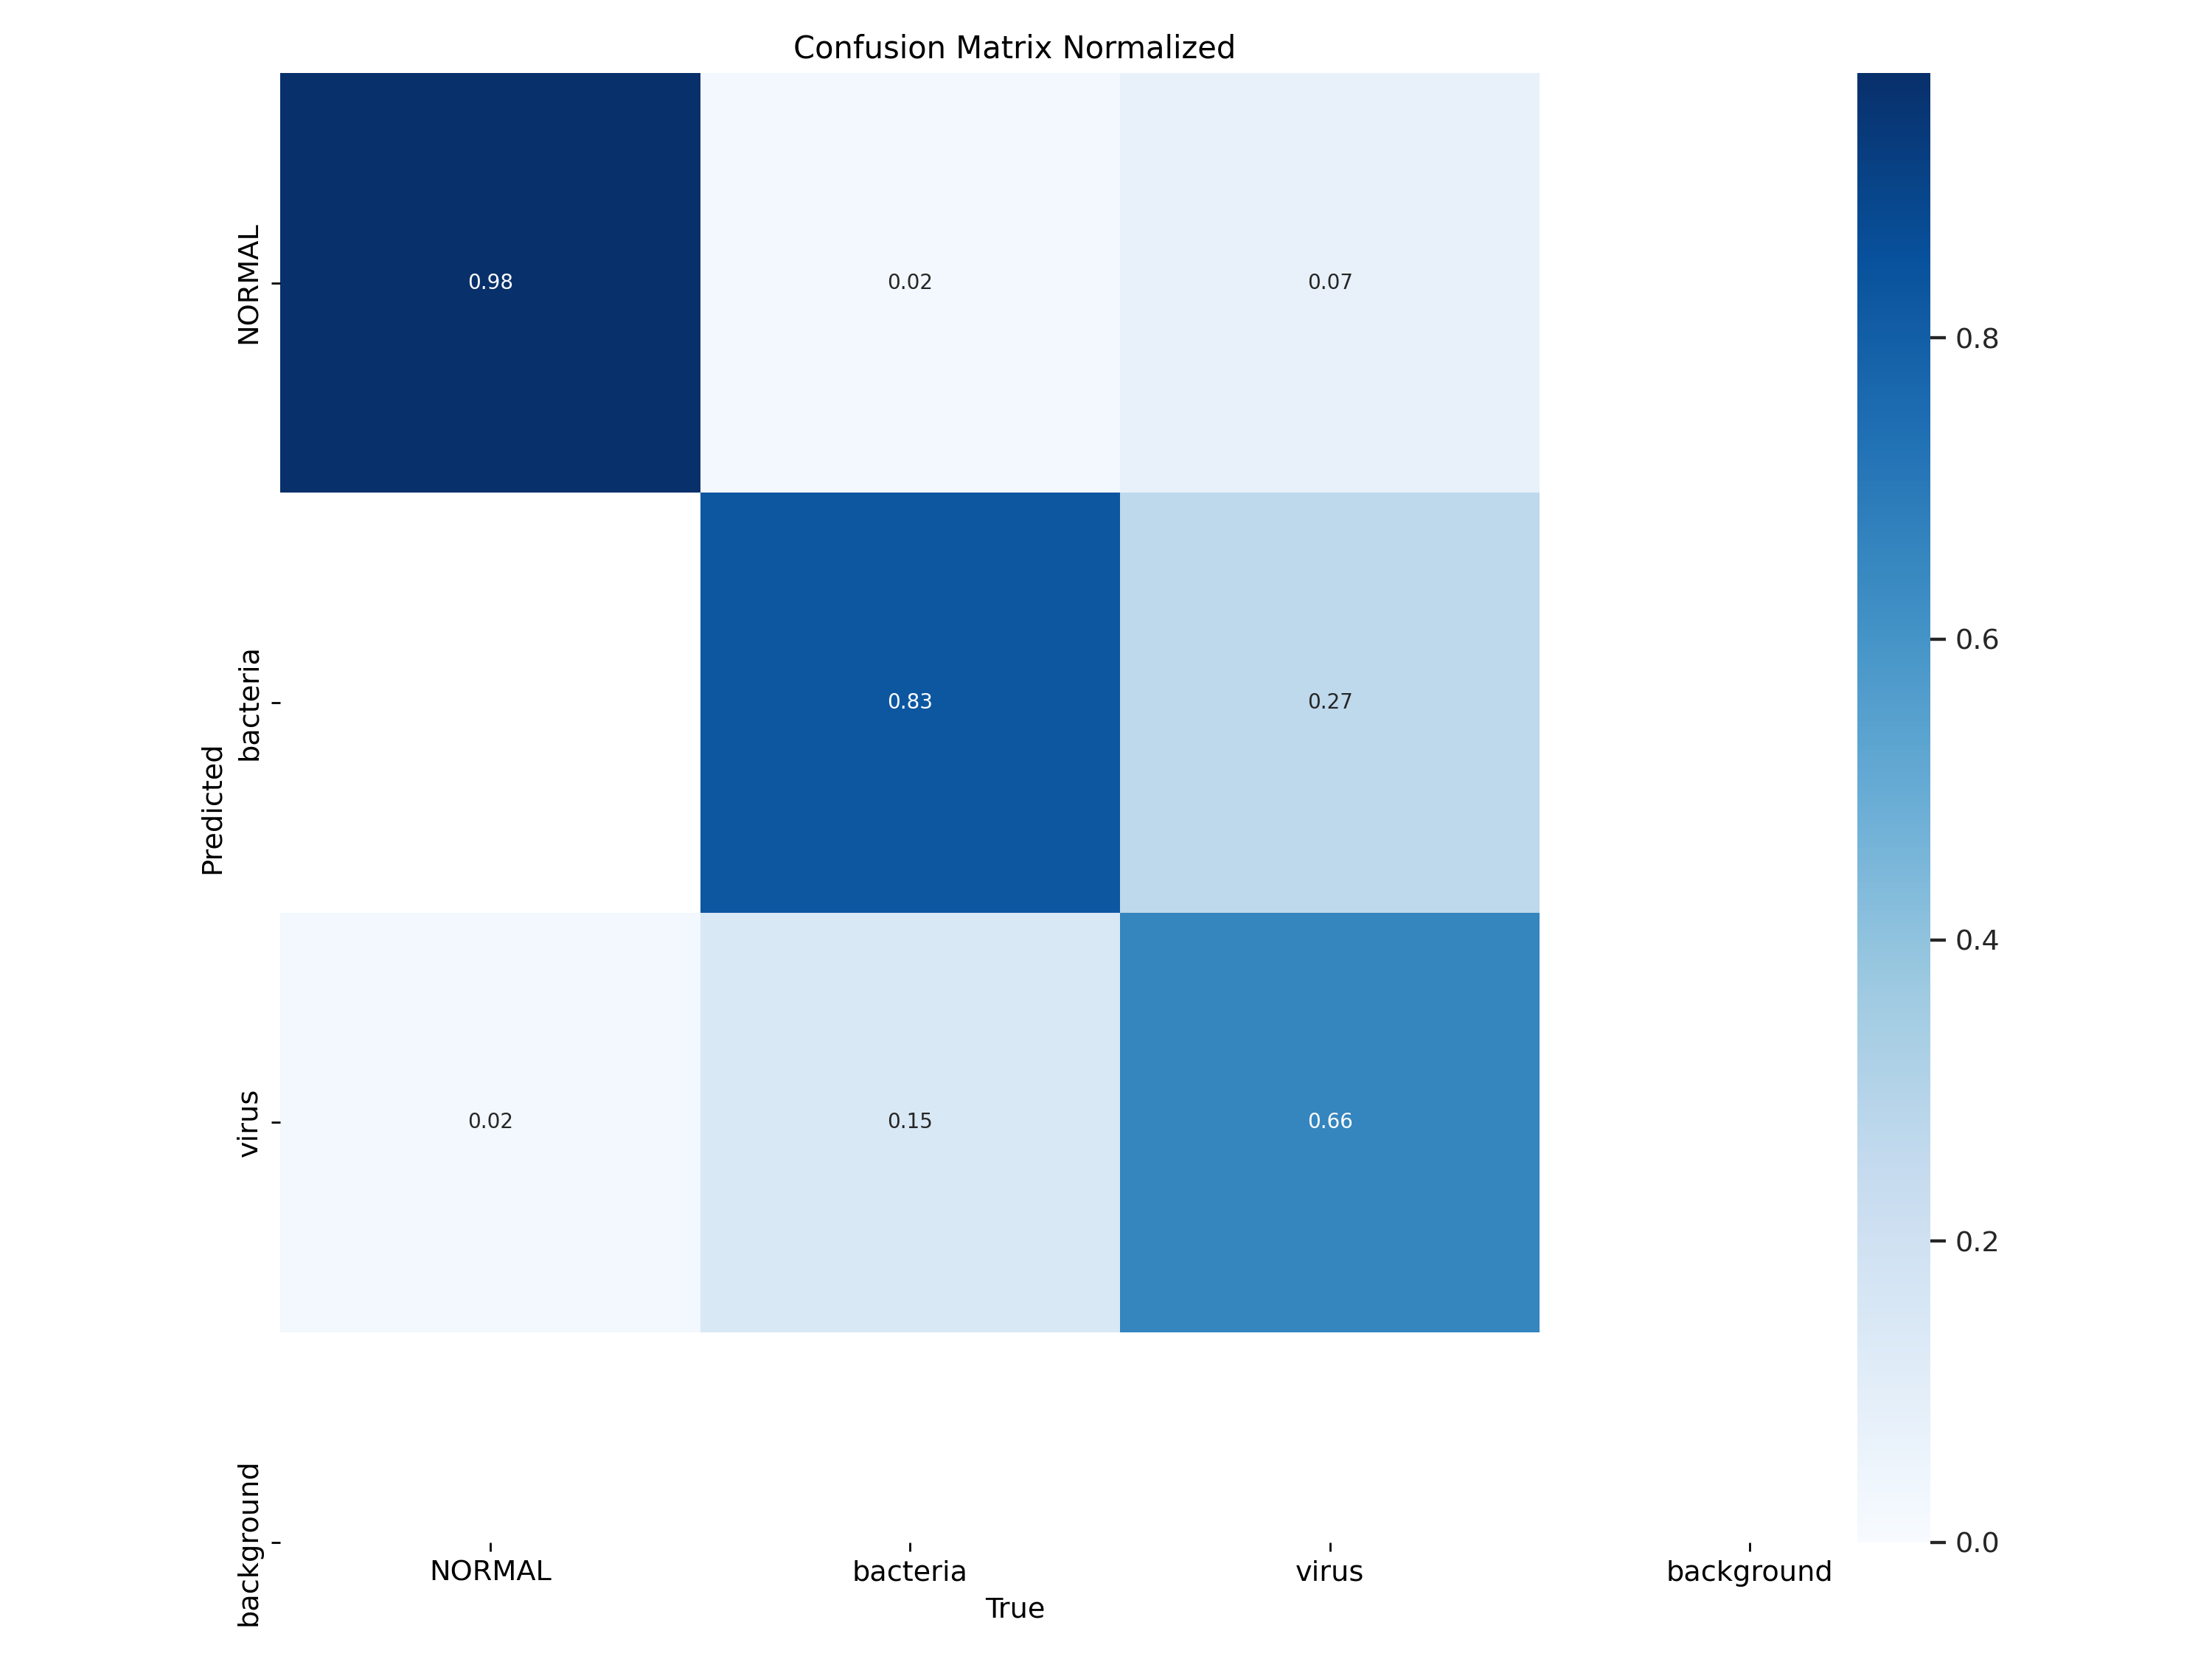

In [39]:
Image(filename=f'{classify_val_save_dir}/confusion_matrix_normalized.png',width=600)

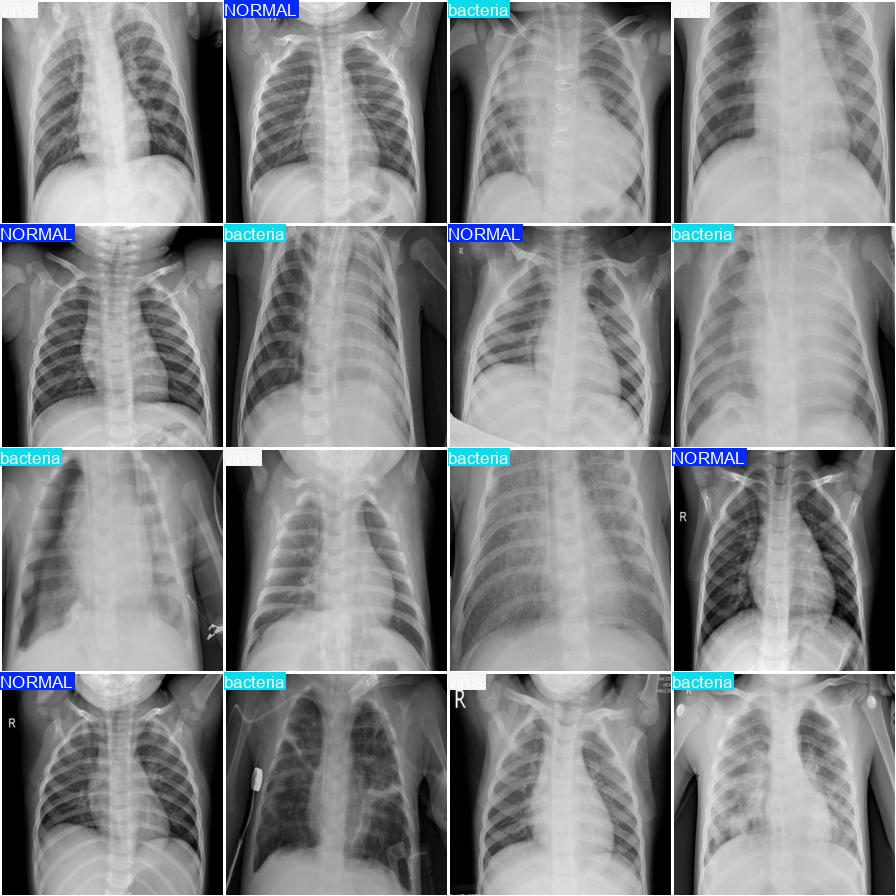

In [40]:
Image(filename=f'{classify_val_save_dir}/val_batch0_labels.jpg',width=600)

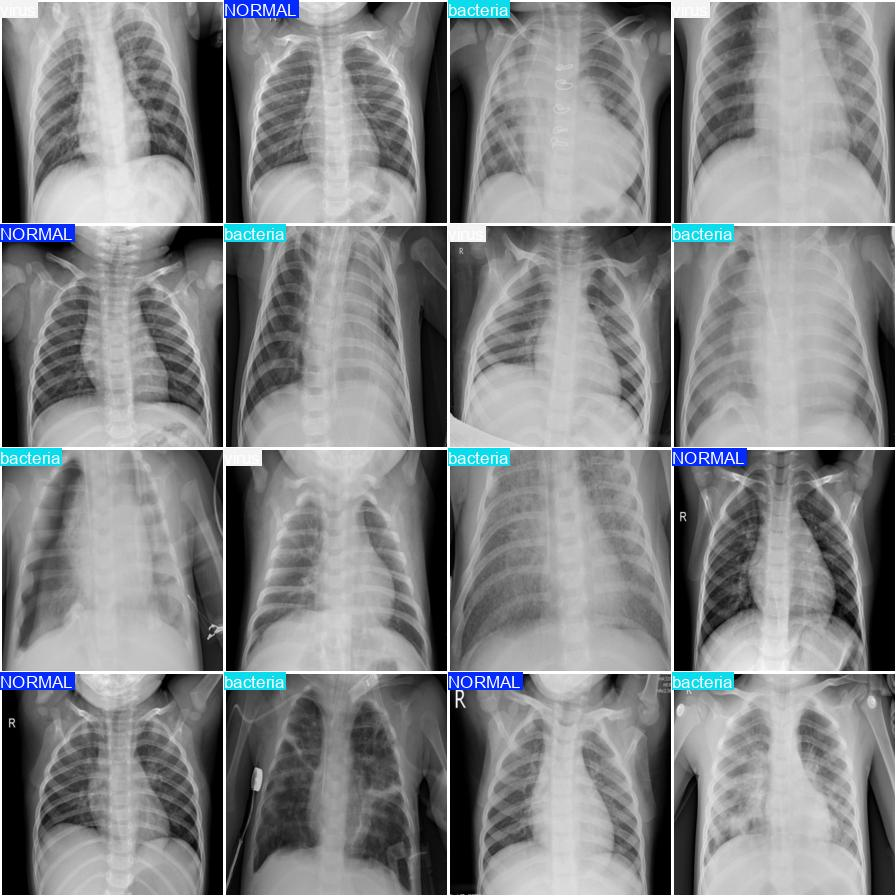

In [41]:
Image(filename=f'{classify_val_save_dir}/val_batch0_pred.jpg',width=600)

## 6. [Printing from Colab](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-print-colab.ipynb#scrollTo=7a810845-9125-48d3-a819-b1cdb1e15399)

You need to save a copy to Google Drive by selecting `File -> Save a copy to Drive`.

In [42]:
!apt-get update
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Chest_Xray_Classification_Train.ipynb' --to pdf
#!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Chest_Xray_Classification_Train.ipynb' --output-dir '/content' --to pdf

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,129 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,207 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 http://archi

ValueError: mount failed

## `NOTEBOOK PRACTICE 10`

---
Modifica el notebook que sirve de linea base para obtener una mejor desempeño.

---

### Instructions to Improve the Notebook (study and work about it by yourself):

ChatGPT can be your great allied. Use it for your convenence.

You can use a model different from nano. You can use other biomedical datase multiclass (3 o 4 class) dataset

Feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences. Happy coding!